In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import KFold, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import DecisionTreeClassifier

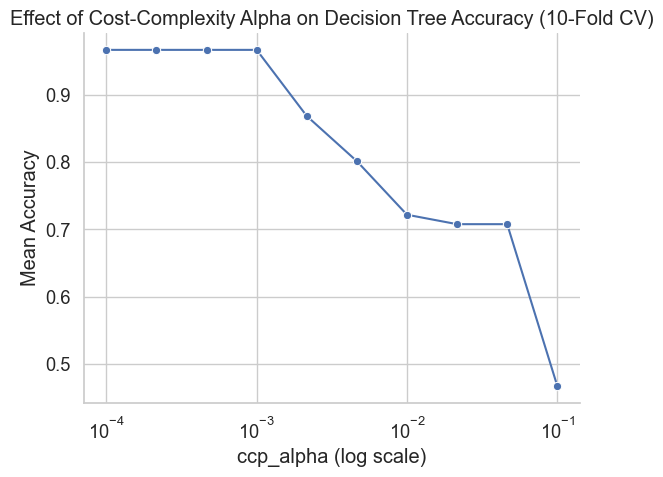

In [4]:
# Load preprocessed data
df = pd.read_pickle("data_prepro01.pkl")

# Define 10-fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Range of alpha values to test (cost-complexity pruning parameter)
alphas = np.logspace(-4, -1, 10)

results = []

for a in alphas:
    # Build pipeline: vectorize text → decision tree
    model = make_pipeline(
        CountVectorizer(),
        DecisionTreeClassifier(random_state=42, ccp_alpha=a)
    )

    # Evaluate with cross-validation
    scores = cross_val_score(model, df['text'], df['label'], cv=kf, scoring='accuracy')
    results.append({"ccp_alpha": a, "mean_accuracy": scores.mean()})

# Convert to DataFrame
df_results = pd.DataFrame(results)

# Plot results
sns.set_theme(style="whitegrid", font_scale=1.2)
ax = sns.lineplot(
    data=df_results,
    x="ccp_alpha",
    y="mean_accuracy",
    marker="o"
)

# Customize plot
ax.set_xscale("log")
ax.set_title("Effect of Cost-Complexity Alpha on Decision Tree Accuracy (10-Fold CV)")
ax.set_xlabel("ccp_alpha (log scale)")
ax.set_ylabel("Mean Accuracy")

sns.despine()